In [2]:

from sklearn.datasets import fetch_openml
import numpy as np

def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    return X,y

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

X,y= load_dataset(.2)
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(X)
Scaled_data=scaling.transform(X)

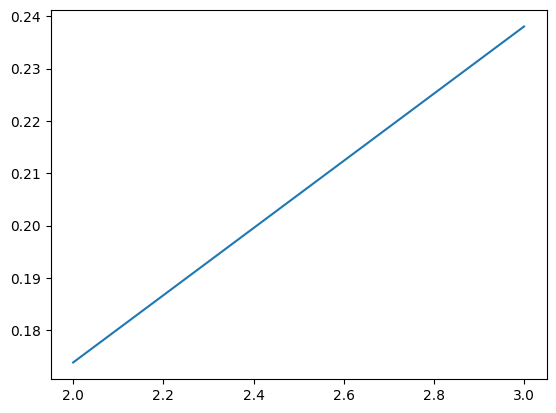

In [5]:
from matplotlib import pyplot as plt


ks=np.arange(2,4)
principal=PCA(n_components=3)
principal.fit(X)
Xs= principal.fit_transform(X)
plt.plot(ks,np.cumsum(principal.explained_variance_ratio_)[ks-1])



In [6]:
from sklearn.cluster import SpectralClustering


sc=SpectralClustering(10)
sc.fit(Xs)

SpectralClustering(n_clusters=10)

In [7]:
y2=sc.fit_predict(Xs)
print(y2)

[0 4 0 ... 5 7 2]


In [12]:
print(y)

0      5
1      0
2      4
3      1
4      9
      ..
695    3
696    2
697    4
698    1
699    5
Name: class, Length: 700, dtype: int64
